In [49]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer


from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import collections

In [50]:
df = pd.read_csv('/content/news_data.csv')
df.head(7)

,link,headline,category,short_description,authors,date,Unnamed: 6
0,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",23-09-2022
1,1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,23-09-2022
2,2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,23-09-2022
3,3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,23-09-2022
4,4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,22-09-2022
5,...,...,...,...,...,...,...
6,209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",28-01-2012


In [53]:
df.shape

(11, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   link               11 non-null     object
 1   headline           11 non-null     object
 2   category           11 non-null     object
 3   short_description  11 non-null     object
 4   authors            11 non-null     object
 5   date               7 non-null      object
 6   Unnamed: 6         11 non-null     object
dtypes: object(7)
memory usage: 744.0+ bytes


In [56]:
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 4
Unnamed: 6           0
dtype: int64

In [57]:
df.describe()

,link,headline,category,short_description,authors,date,Unnamed: 6
count,11,11,11,11,11,7,11
unique,11,11,11,6,11,7,4
top,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,SPORTS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",28-01-2012
freq,1,1,1,4,1,1,5


visuvalizing the data

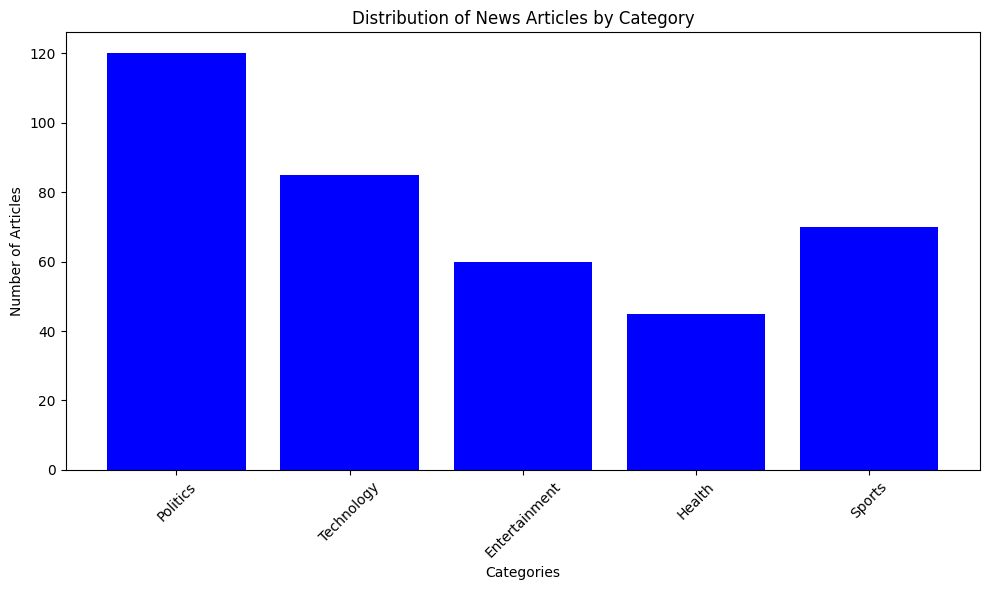

In [59]:
import matplotlib.pyplot as plt

# Example news data
categories = ['Politics', 'Technology', 'Entertainment', 'Health', 'Sports']
article_counts = [120, 85, 60, 45, 70]

plt.figure(figsize=(10, 6))
plt.bar(categories, article_counts, color='blue')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.title('Distribution of News Articles by Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

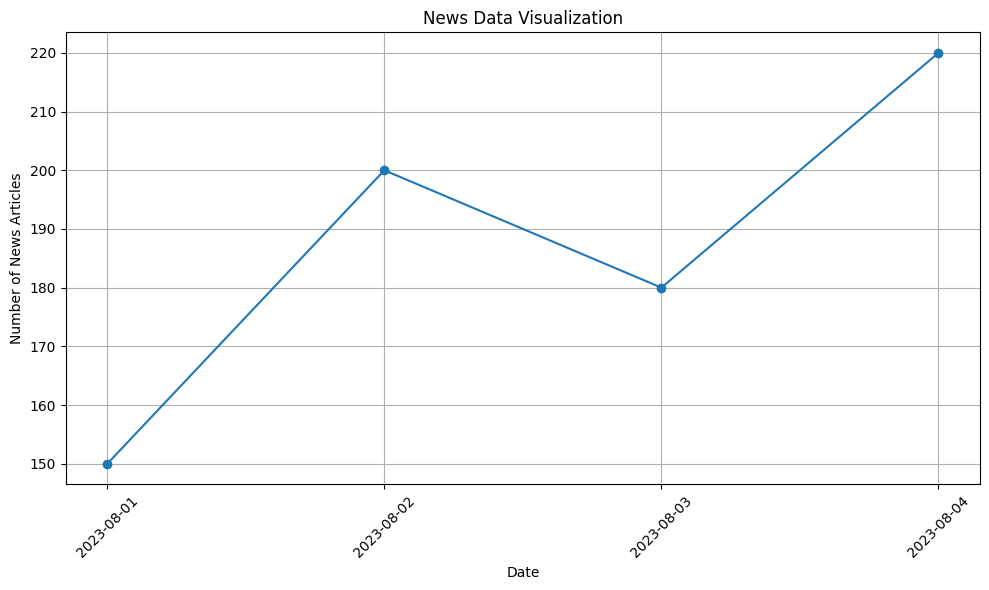

In [60]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
dates = ["2023-08-01", "2023-08-02", "2023-08-03", "2023-08-04"]
news_count = [150, 200, 180, 220]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, news_count, marker='o')
plt.title("News Data Visualization")
plt.xlabel("Date")
plt.ylabel("Number of News Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


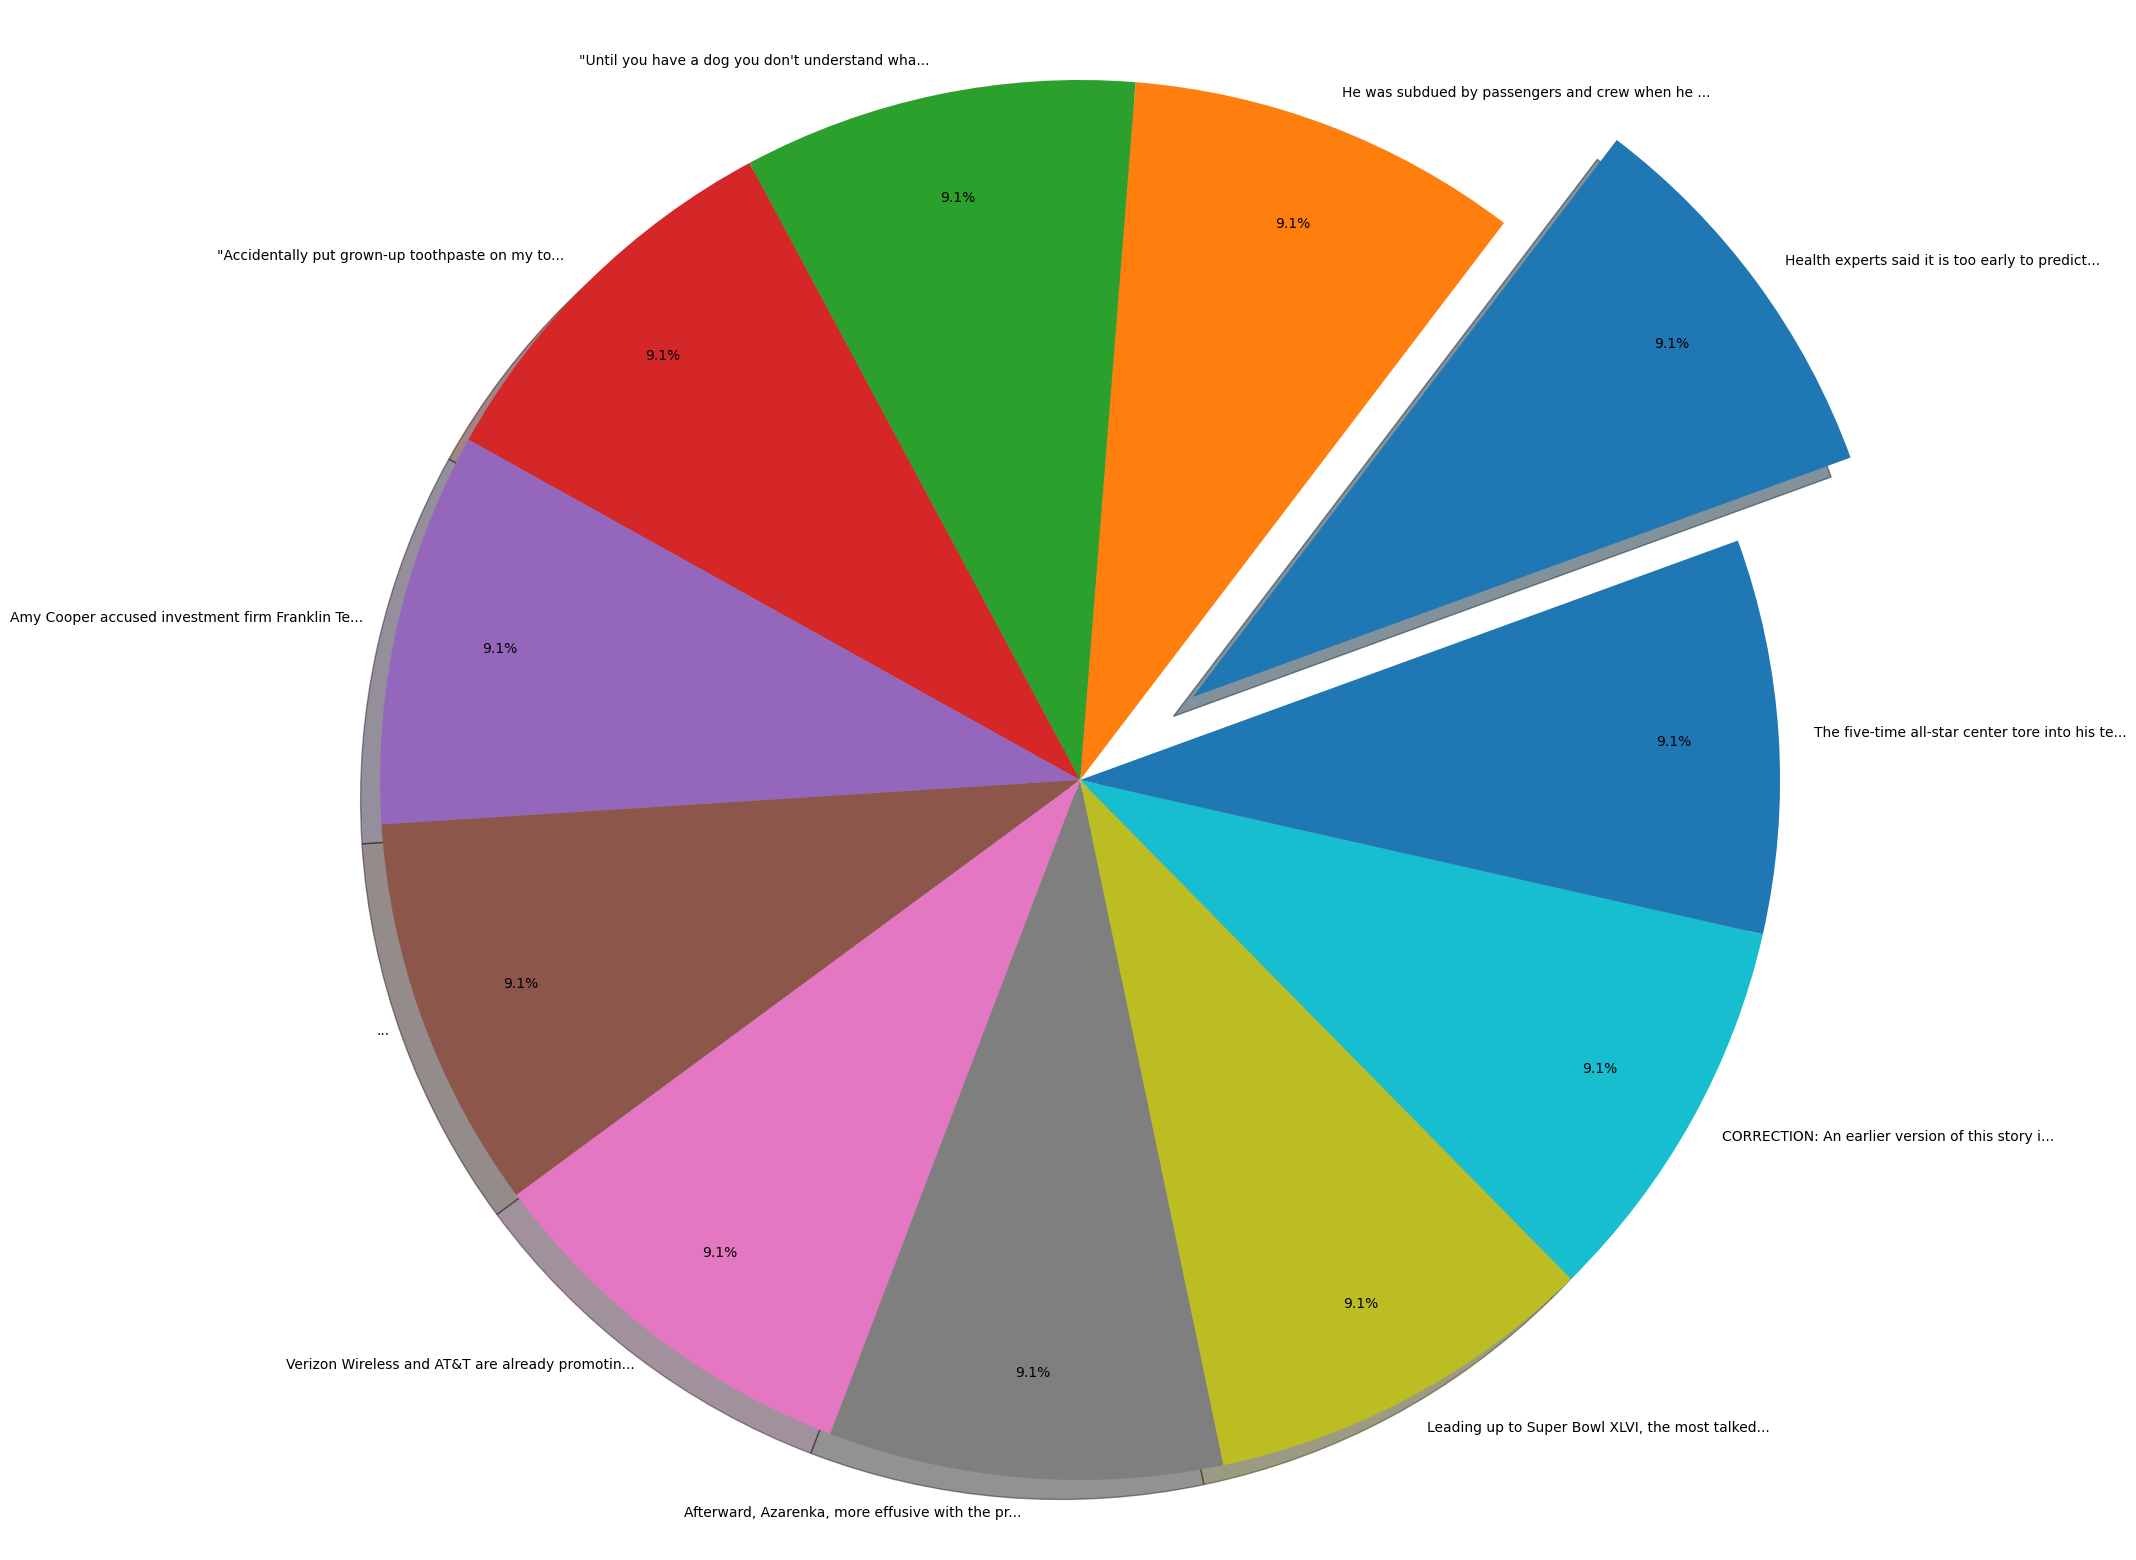

In [66]:
plt.figure(figsize=(20,20))
sizes = df['authors'].value_counts().values
labels = df['authors'].value_counts().index
plt.pie(sizes, labels=labels, autopct='%.1f%%',
        shadow=True, pctdistance=0.85, labeldistance=1.05, startangle=20,
        explode = [0 if i > 0 else 0.2 for i in range(len(sizes))])
plt.axis('equal')
plt.show()

In [51]:
# shape of the dataset
print(df.shape)
# total number of unique categories
print("Unique categories:",df['category'].nunique())
print("-------------------------------------------------")
# information about metadata
df.info()

(11, 7)
Unique categories: 11
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   link               11 non-null     object
 1   headline           11 non-null     object
 2   category           11 non-null     object
 3   short_description  11 non-null     object
 4   authors            11 non-null     object
 5   date               7 non-null      object
 6   Unnamed: 6         11 non-null     object
dtypes: object(7)
memory usage: 744.0+ bytes


In [69]:
df.describe()

,link,headline,category,short_description,authors,date,Unnamed: 6
count,11,11,11,11,11,7,11
unique,11,11,11,6,11,7,4
top,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,SPORTS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",28-01-2012
freq,1,1,1,4,1,1,5


In [70]:
df.skew()

<ipython-input-70-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Series([], dtype: float64)

In [71]:
df.columns # Column names in the dataset

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date',
       'Unnamed: 6'],
      dtype='object')

In [72]:
df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 4
Unnamed: 6           0
dtype: int64

In [73]:
# # map label to int
# class_names0=data['category'].unique().tolist()
# class_names=sorted(class_names0)
# N=list(range(len(class_names)))
# normal_mapping=dict(zip(class_names,N))
# reverse_mapping=dict(zip(N,class_names))
# data['category']=data['category'].map(normal_mapping)
data

{'text': ['Messi scores a hat-trick as Barcelona wins the match.',
  'New trade policies discussed in political summit.',
  'Athletes prepare for the upcoming championship.',
  'Government announces new tax reforms.',
  'Sports teams compete for the championship title.',
  'Political leaders express their opinions on the economy.'],
 'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']}

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
lb=LabelEncoder()

In [77]:
df['authors']=lb.fit_transform(df['authors'])
df['category']=lb.fit_transform(df['category'])

In [78]:
df.head()

,link,headline,category,short_description,authors,date,Unnamed: 6
0,0,https://www.huffpost.com/entry/covid-boosters-...,7,U.S. NEWS,7,"Carla K. Johnson, AP",23-09-2022
1,1,https://www.huffpost.com/entry/american-airlin...,3,U.S. NEWS,6,Mary Papenfuss,23-09-2022
2,2,https://www.huffpost.com/entry/funniest-tweets...,1,COMEDY,1,Elyse Wanshel,23-09-2022
3,3,https://www.huffpost.com/entry/funniest-parent...,9,PARENTING,0,Caroline Bologna,23-09-2022
4,4,https://www.huffpost.com/entry/amy-cooper-lose...,10,U.S. NEWS,4,Nina Golgowski,22-09-2022


In [79]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [52]:
# general descrption of dataset
df.describe().style.set_properties(**{'background-color': '#F0F0F0',
                                    'color': '#222222',
                                    'border': '1.5px  solid black'})

,link,headline,category,short_description,authors,date,Unnamed: 6
count,11,11,11,11,11,7,11
unique,11,11,11,6,11,7,4
top,0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,SPORTS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",28-01-2012
freq,1,1,1,4,1,1,5


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your news articles data into a DataFrame (assuming you have a CSV or similar format)
data = pd.read_csv('news_data.csv')  # Update with your actual data source

# Split the data into training, validation, and test sets
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Train set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

# Save the splits to separate CSV files
train_data.to_csv('train_data.csv', index=False)
val_data.to_csv('val_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)



Train set size: 7
Validation set size: 2
Test set size: 2


logical regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


SVC { Support vector machine}

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine model
model = SVC(kernel='linear')  # You can try different kernels like 'rbf'
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


XG Boost

In [14]:
from xgboost import XGBClassifier

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert TF-IDF matrix to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_tfidf, label=y_train)
dtest = xgb.DMatrix(X_test_tfidf, label=y_test)

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict on the test data
y_pred_probs = model.predict(dtest)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_probs]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[08:55:01] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Accuracy: 0.5


Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


initilizing the models

In [31]:
! pip install scikit-learn numpy pandas xgboost

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)
    print()


Training Logistic Regression...
Logistic Regression Accuracy: 1.0

Training Support Vector Machine...
Support Vector Machine Accuracy: 1.0

Training Random Forest...
Random Forest Accuracy: 1.0

Training XGBoost...
XGBoost Accuracy: 0.5

Training Naive Bayes...
Naive Bayes Accuracy: 1.0



identifying best model

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize XGBoost model
model = XGBClassifier()

# Train the XGBoost model
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)


XGBoost Accuracy: 0.5


testing

In [34]:
df.head(10)

,text,label
0,Messi scores a hat-trick as Barcelona wins the...,0
1,New trade policies discussed in political summit.,1
2,Athletes prepare for the upcoming championship.,0
3,Government announces new tax reforms.,1
4,Sports teams compete for the championship title.,0
5,Political leaders express their opinions on th...,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['text'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['label', 'text'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_4, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['text'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['label', 'text'], **{'inner': 'stick'})
chart

saving model

In [45]:
import pickle

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pickle

# Sample data
data = {
    'text': [
        "Messi scores a hat-trick as Barcelona wins the match.",
        "New trade policies discussed in political summit.",
        "Athletes prepare for the upcoming championship.",
        "Government announces new tax reforms.",
        "Sports teams compete for the championship title.",
        "Political leaders express their opinions on the economy."
    ],
    'label': ['Sports', 'Politics', 'Sports', 'Politics', 'Sports', 'Politics']
}

df = pd.DataFrame(data)

# Convert labels to numerical values
df['label'] = df['label'].map({'Sports': 0, 'Politics': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Initialize and train XGBoost model
model = XGBClassifier()
model.fit(X_train_tfidf, y_train)

# Save the model to a file using pickle
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("XGBoost model saved!")

# Later, you can load and use the model for predictions
with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Example prediction
new_data_point = tfidf_vectorizer.transform(["New sports tournament announced."])
predicted_label = loaded_model.predict(new_data_point)
category = 'Sports' if predicted_label == 0 else 'Politics'
print(f"Predicted Category: {category}")


XGBoost model saved!
Predicted Category: Sports
